# 第一题：使用sklearn的GaussianMixture完成聚类

实验内容：
1. 使用sklearn的GaussianMixture在Breast_Cancer_Wisconsin数据集上完成聚类任务
2. 对聚类结果可视化
3. 对比外部指标FMI和NMI
4. 选取数据集部分特征进行GaussianMixture聚类，然后对聚类结果进行可视化，并与全量特征的聚类结果进行对比分析

## 1. 导入模块

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn.datasets
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## 2. 导入数据集

In [2]:
data = pd.read_csv('../data/cluster_data')
data_ = data.values
data_x = data_[:,2:-1]
data_y = data_[:,1:2]

## 3. 导入模型

In [3]:
from sklearn.mixture import GaussianMixture

## 4. 训练模型

In [14]:
tem_data = pd.read_csv("../data/cluster_data")
tem_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# YOUR CODE HERE

model = GaussianMixture(n_components=2)
model.fit(data_x)
y_hat = model.predict(data_x)

In [5]:
# 聚类结果统计
def getResult(data_y,y_hat):
    true_labels = data_y.reshape(-1)
    cluster = {}
    # 构造簇
    for i in range(len(y_hat)):
        cluster_label = y_hat[i]
        if cluster_label not in cluster:
            cluster[cluster_label] = {}
    # 构造簇内类别标签
    for cluster_label in cluster:
        for true_label in list(set(true_labels)):
            cluster[cluster_label][true_label] = 0
    # 添加簇内数据
    for i in range(len(y_hat)):
            cluster_label = y_hat[i]
            cluster[cluster_label][true_labels[i]] +=1
    # 按照簇序号排序
    cluster = dict(sorted(cluster.items(),key = lambda x:x[0]))
    return cluster
cluster = getResult(data_y, y_hat)
print(cluster)

{0: {'M': 17, 'B': 346}, 1: {'M': 195, 'B': 11}}


## 5. 聚类结果可视化

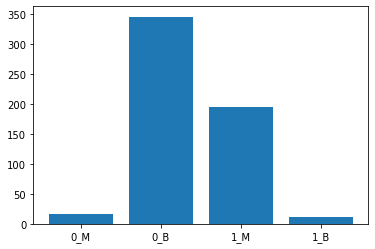

In [6]:
def draw_bar(cluster_data):
    label = []
    nums = []
    for i in cluster.items():
        for j in i[1].items():
            # print(j)
            # print(type(j))
            label.append(str(i[0])+"_"+str(j[0]))
            nums.append(j[1])
    plt.bar(label, nums)
draw_bar(cluster)

## 6. 指标计算

我们这里选用两个外部指标，FMI和NMI。

互信息(mutual information)表示了两个分布的一致程度。归一化的互信息(NMI)将互信息值映射到0到1的空间内。值越高，说明两个分布的一致性越高。

FMI是Fowlkes-Mallows index，使用precision和recall计算得到，其值域也是0到1，越大说明聚类效果越和参考模型相近。

In [8]:
from sklearn.metrics import normalized_mutual_info_score
from sklearn.metrics import fowlkes_mallows_score

In [9]:
# YOUR CODE HERE
print("normalized_mutual_info_score", normalized_mutual_info_score(data_y.reshape(-1), y_hat))
print("fowlkes_mallows_score", fowlkes_mallows_score(data_y.reshape(-1), y_hat))

normalized_mutual_info_score 0.7061254214484894
fowlkes_mallows_score 0.9123149871832625


## 7. 选取数据集部分特征进行GaussianMixture聚类：并对比聚类结果

In [10]:
# 选取部分列特征
# 一开始选了 0 1 列 是id 和label 这是不对的
data2 = data.iloc[:,[2,3,4,5]]
data2.head()

,radius_mean,texture_mean,perimeter_mean,area_mean
0,17.99,10.38,122.80,1001.0
1,20.57,17.77,132.90,1326.0
2,19.69,21.25,130.00,1203.0
3,11.42,20.38,77.58,386.1
4,20.29,14.34,135.10,1297.0


normalized_mutual_info_score 0.5242754806410004
fowlkes_mallows_score 0.835774966817102


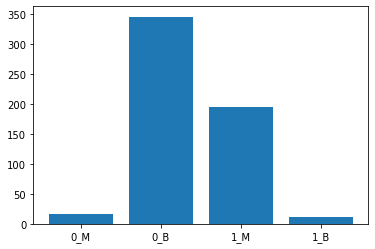

In [11]:
# 训练模型，聚类结果可视化，计算指标
# YOUR CODE HERE

model = GaussianMixture(n_components=2)
model.fit(data2.values)
y_hat2 = model.predict(data2)
cluster2 = getResult(data_y, y_hat2)
draw_bar(cluster2)
print("normalized_mutual_info_score", normalized_mutual_info_score(data_y.reshape(-1), y_hat2))
print("fowlkes_mallows_score", fowlkes_mallows_score(data_y.reshape(-1), y_hat2))

选取部分特征后效果些微变差。

# 第二题：使用sklearn的KMeans完成聚类

实验内容：
1. 使用sklearn的KMeans在breast_cancer.data数据集上完成聚类任务
2. 对聚类结果可视化
3. 对比外部指标FMI和NMI
4. 选取数据集部分特征进行KMeans聚类，然后对聚类结果进行可视化，并与全量特征的聚类结果进行对比分析

## 导入模块

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## 导入数据集

In [2]:
data = pd.read_csv('../data/cluster_data')
data_ = data.values
data_x = data_[:,2:-1]
data_y = data_[:,1:2]

## 导入模型

In [3]:
from sklearn.cluster import KMeans

## 训练模型

In [11]:
# YOUR CODE HERE
model = KMeans(n_clusters=2)
model.fit(data_x)
y_hat = model.predict(data_x)

In [12]:
def getResult(data_y,y_hat):
    true_labels = data_y.reshape(-1)
    cluster = {}
    # 构造簇
    for i in range(len(y_hat)):
        cluster_label = y_hat[i]
        if cluster_label not in cluster:
            cluster[cluster_label] = {}
    # 构造簇内类别标签
    for cluster_label in cluster:
        for true_label in list(set(true_labels)):
            cluster[cluster_label][true_label] = 0
    # 添加簇内数据
    for i in range(len(y_hat)):
            cluster_label = y_hat[i]
            cluster[cluster_label][true_labels[i]] +=1
    # 按照簇序号排序
    cluster = dict(sorted(cluster.items(),key = lambda x:x[0]))
    return cluster
cluster = getResult(data_y,y_hat)
print(cluster)

{0: {'M': 130, 'B': 1}, 1: {'M': 82, 'B': 356}}


## 聚类结果可视化

In [6]:
# YOUR CODE HERE
def draw_bar(cluster_data):
    label = []
    nums = []
    for i in cluster.items():
        for j in i[1].items():
            # print(j)
            # print(type(j))
            label.append(str(i[0])+"_"+str(j[0]))
            nums.append(j[1])
    plt.bar(label, nums)

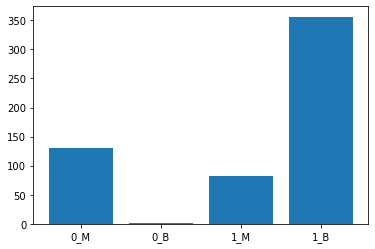

In [13]:
draw_bar(cluster)

## 指标计算

In [14]:
from sklearn.metrics import normalized_mutual_info_score
from sklearn.metrics import fowlkes_mallows_score
# YOUR CODE HERE
print("normalized_mutual_info_score", normalized_mutual_info_score(data_y.reshape(-1), y_hat))
print("fowlkes_mallows_score", fowlkes_mallows_score(data_y.reshape(-1), y_hat))

normalized_mutual_info_score 0.46479332792160793
fowlkes_mallows_score 0.7915171728708068


## 选取数据集部分特征进行KMeans聚类：并对比聚类结果

   radius_mean  texture_mean  perimeter_mean  area_mean
0        17.99         10.38          122.80     1001.0
1        20.57         17.77          132.90     1326.0
2        19.69         21.25          130.00     1203.0
3        11.42         20.38           77.58      386.1
4        20.29         14.34          135.10     1297.0
normalized_mutual_info_score 0.4196358631006222
fowlkes_mallows_score 0.7762511790232877


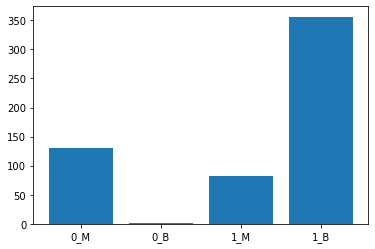

In [16]:
# 选取部分列特征
data2 = data.iloc[:,[2,3,4,5]]
print(data2.head())
# YOUR CODE HERE
model = KMeans(n_clusters=2)
model.fit(data2)
y_hat2 = model.predict(data2)
cluster2 = getResult(data_y, y_hat2)
draw_bar(cluster2)
print("normalized_mutual_info_score", normalized_mutual_info_score(data_y.reshape(-1), y_hat2))
print("fowlkes_mallows_score", fowlkes_mallows_score(data_y.reshape(-1), y_hat2))

选用部分特征后，效果变差了

# 第三题：使用sklearn的AgglomerativeClustering完成层次聚类

实验内容：
1. 使用sklearn的AgglomerativeClustering完成Breast_Cancer_Wisconsin数据集的层次聚类
2. 计算外部指标FMI和NMI
3. 对多种形式的聚类效果可视化

**注意：在运行本notebook前需要讲sklearn更新至0.20及以上版本**

## 导入模型

In [12]:
from sklearn.cluster import AgglomerativeClustering

## 训练模型

层次聚类的`linkage`参数表示我们要用哪种距离（平均、最大、最小）进行聚类。这里我们选择`average`表示平均距离。`complete`表示最大距离，`single`表示最小距离。

**其中：single参数是在sklearn 0.20版本才加入的！**

In [13]:
# YOUR CODE HERE
data = pd.read_csv('../data/cluster_data')
data_ = data.values
print(data.head())
data_x = data_[:,2:-1]
data_y = data_[:,1:2]

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [17]:
model = AgglomerativeClustering(linkage="average")
y_hat = model.fit(data_x).labels_

## 聚类效果可视化

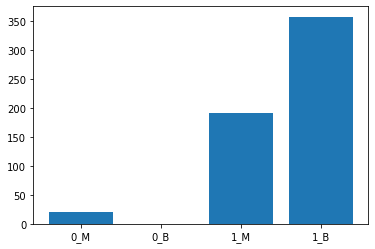

In [18]:
# YOUR CODE HERE
cluster = getResult(data_y, y_hat)
draw_bar(cluster)

## Test

请你完成"single"，"complete"和"average"三种距离在两个数据集上的聚类任务，并绘制出聚类结果，计算各个情况的FMI和NMI




In [23]:
def getIndex(x, y):
    params = ['single', 'complete', 'average']
    result = []
    for param in params:
        model = AgglomerativeClustering(linkage=param)
        y_hat = model.fit(x).labels_
        cluster = getResult(y, y_hat)
        plt.figure()
        plt.title(param)
        draw_bar(cluster)
        fmi = fowlkes_mallows_score(y.reshape(-1), y_hat)
        nmi = normalized_mutual_info_score(y.reshape(-1), y_hat)
        result.append([param, fmi, nmi])
    return pd.DataFrame(data= result, columns=["linkage", "FMI", "NMI"])

,linkage,FMI,NMI
0,single,0.728632,0.005162
1,complete,0.721494,0.088097
2,average,0.721494,0.088097


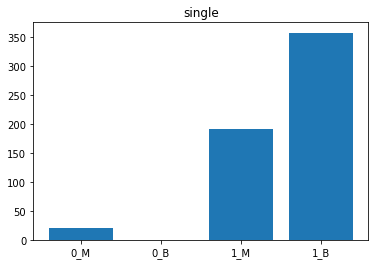

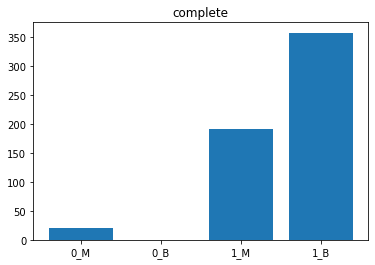

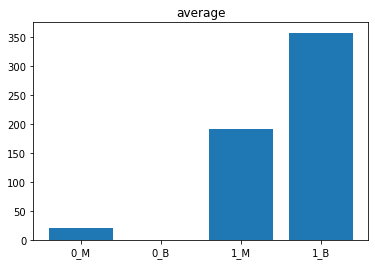

In [24]:
getIndex(data_x, data_y)

# 第四题：手动实现K-means

实验内容：
1. 实现一个K-means聚类算法，并在Breast_Cancer_Wisconsin数据集上完成聚类任务
2. 计算外部指标FMI和NMI
3. 对聚类结果可视化

我们要实现一个K-means算法，也称为原型聚类算法。

## 初始化

K-means在实现的时候，首先需要选取类簇中心。类簇中心的选取方法有很多，我们这里使用最简单的方法，随机选取。也就是，从给定的待聚类的样本中，随机选取 $K$ 个样本，作为 $K$ 个类簇的中心。

## 优化

选取类中心后，就需要不断的调成类中心的位置，开始优化过程，优化主要分为两步：

### 第一步

计算所有样本到 $K$ 个类中心的距离。每个样本，选择距自己最近的类中心作为自己属于的类簇。（这里的距离我们选择欧式距离）

### 第二步

针对第一步分出来的 $K$ 个类簇，计算每个类簇内样本的均值，将计算得到的 $K$ 个均值向量，作为这 $K$ 个类簇新的中心。

### 然后循环第一步和第二步，直至一定的迭代次数，或类中心无显著的位置改变为止。

In [3]:
# 导入数据
data = pd.read_csv('../data/cluster_data')
data_ = data.values
print(data.head())
data_x = data_[:,2:-1]
data_y = data_[:,1:2]

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

## 欧式距离的实现

给定向量 $x \in \mathbb{R}^m$，$y \in \mathbb{R}^m$，两个向量的欧式距离定义为：

$$
E(x, y) = \sqrt{\sum^m_{i = 1} (x_i - y_i)^2}
$$

其中, $i$ 表示向量的第 $i$ 个分量。

我们要实现一个可以计算多个样本组成的矩阵 $X$，与某一个类中心 $y$ 之间欧氏距离的函数。

给定输入矩阵 $X \in \mathbb{R}^{n \times m}$，其中 $n$ 是样本数，$m$ 是特征数，给定输入的类簇中心 $y \in \mathbb{R}^m$。

我们要计算 $n$ 个样本到某一类簇中心 $y$ 的欧式距离，最后的结果是 $E \in \mathbb{R}^{n}$，每个元素表示矩阵 $X$ 中的每个样本到类中心 $y$ 的欧式距离。

In [8]:
def compute_distance(X, y):
    '''
    计算样本矩阵X与类中心y之间的欧氏距离
    
    Parameters
    ----------
    X, np.ndarray, 样本矩阵 X, 维度：(n, m)
    
    y, np.ndarray, 类中心 y，维度：(m, )
    
    Returns
    ----------
    distance, np.ndarray, 样本矩阵 X 每个样本到类中心 y 之间的欧式距离，维度：(n, )
    '''
    
    # YOUR CODE HERE
    distance = np.sum(np.square(X - y), axis=1)
    return distance

In [10]:
X = np.array([i for i in range(9)]).reshape((3, 3))
y = np.array([2, 2, 2])
print(compute_distance(X, y))

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[2 2 2]
[ 5 14 77]


下面开始实现K-means聚类算法

In [12]:
import random

In [37]:
class myKmeans:
    def __init__(self, n_clusters, max_iter = 100):
        '''
        初始化，三个成员变量
        
        Parameters
        ----------
        n_clusters: int, 类簇的个数
        
        max_iter, int, default 100, 最大迭代轮数，默认为100
        
        '''
        # 表示类簇的个数
        self.n_clusters = n_clusters
        
        # 表示最大迭代次数
        self.max_iter = int(max_iter)
        
        # 类簇中心
        self.centroids = None
    
    def choose_centroid(self, X):
        '''
        选取类簇中心
        
        Parameters
        ----------
        X: np.ndarray, 样本矩阵X，维度：(n, m)
        
        Returns
        ----------
        centroids: np.ndarray, 维度：(n_clusters, m)
        
        '''
        # YOUR CODE HERE
        id = set()
        while len(id) < self.n_clusters:
            id.add(random.randint(0, X.shape[0]))
        id = list(id)
        centroids = X[id, :]
        return centroids
    
    def compute_label(self, X):
        '''
        给定样本矩阵X，结合类中心矩阵self.centroids，计算样本矩阵X内每个样本属于哪个类簇
        
        Parameters
        ----------
        X: np.ndarray, 样本矩阵X，维度：(n, m)
        
        Returns
        ----------
        labels: np.ndarray, 维度：(n, )
        
        '''
        # 将每个样本到每个类簇中心的距离存储在distances中，每行表示当前样本对于不同的类中心的距离
        distances = np.empty((len(X), self.n_clusters))
        # distances shape (n, n_clusters)
        # 遍历类中心，对每个类中心，计算所有的样本到这个类中心的距离
        for index in range(len(self.centroids)):
            distances[:, index] = compute_distance(X, self.centroids[index])
            # 计算样本矩阵X所有样本到当前类中心的距离，存储在distances中的第index列中
            
        # print(distances)
        # 取distances每行最小值的下标，这个下标就是这个样本属于的类簇的标记
        # YOUR CODE HERE
        labels = np.argmin(distances, axis=1)
        # print(labels)
        # 返回每个样本属于的类簇的标记
        return labels
    
    def fit(self, X):
        '''
        聚类，包含类中心初始化，类中心优化两个部分
        
        Parameters
        ----------
        X: np.ndarray, 样本矩阵X，维度：(n, m)
        
        '''
        # 类中心随机初始化

        self.centroids = self.choose_centroid(X)
        
        # 优化self.max_iter轮
        for epoch in range(self.max_iter):
            flag = 0
            # 计算当前所有样本的属于哪个类簇
            labels = self.compute_label(X)
            # print(labels)
            
            # 重新计算每个类簇的类中心
            for index in range(self.n_clusters):
                # 重新计算第 index 个类中心，对属于这个类簇的样本取均值
                tem_before = self.centroids[index]
                self.centroids[index] = np.mean(X[labels==index], axis=0)
                if np.abs(tem_before - self.centroids[index]).sum() < 1e-6:
                    flag=1
            if flag:
                return self.compute_label(X)
            # 终止判断
            # YOUR CODE HERE        

## 模型训练

In [34]:
# 初始化一个模型
model = myKmeans(n_clusters=2)
model.fit(data_x)


# 对X进行聚类，计算类中心
y_hat = model.compute_label(data_x)

# 计算X的类标记


## 聚类结果统计与可视化

In [27]:

def getResult(data_y,y_hat):
    true_labels = data_y.reshape(-1)
    cluster = {}
    # 构造簇
    for i in range(len(y_hat)):
        cluster_label = y_hat[i]
        if cluster_label not in cluster:
            cluster[cluster_label] = {}
    # 构造簇内类别标签
    for cluster_label in cluster:
        for true_label in list(set(true_labels)):
            cluster[cluster_label][true_label] = 0
    # 添加簇内数据
    for i in range(len(y_hat)):
            cluster_label = y_hat[i]
            cluster[cluster_label][true_labels[i]] +=1
    # 按照簇序号排序
    cluster = dict(sorted(cluster.items(),key = lambda x:x[0]))
    return cluster

def draw_bar(cluster_data):
    label = []
    nums = []
    for i in cluster.items():
        for j in i[1].items():
            # print(j)
            # print(type(j))
            label.append(str(i[0])+"_"+str(j[0]))
            nums.append(j[1])
    plt.bar(label, nums)

{0: {'B': 356, 'M': 79}, 1: {'B': 1, 'M': 133}}


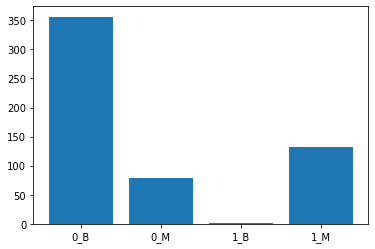

In [35]:
cluster = getResult(data_y,y_hat)
print(cluster)
draw_bar(cluster)

## 指标计算

In [32]:
from sklearn.metrics import normalized_mutual_info_score
from sklearn.metrics import fowlkes_mallows_score

In [36]:
print("normalized_mutual_info_score", normalized_mutual_info_score(data_y.reshape(-1), y_hat))
print("fowlkes_mallows_score", fowlkes_mallows_score(data_y.reshape(-1), y_hat))

normalized_mutual_info_score 0.47708478574056745
fowlkes_mallows_score 0.7966273673852614


由sklearn 调包计算出的NMI和FMS分别是 0.46479332792160793和0.7915171728708068，这和手动实现的在误差范围内，证明手动实现Kmeans模型正确。

# 实验收获
最后的手动实现kmeans中，类函数fit，本来设置为其return label。原以为，这样不用重复再调用一次compute_labels函数计算标签。实际上，这样保存的是上一轮的标签结果，所以开始实现结果和调包的kmeans相差比较大。后边修改为return compute_labels既可。